---
title: Quiz 1
author: Brian Kwon
format:        
    html:                
        embed-resources: true
---


In [78]:
library(tidyverse)

1. Notations.

Use capital letters to denote different events in this question.
Specify all probabilities mentioned in the problem using conditional probability notations and general probability notations.


Y = Using iPhone\
N = Using a different phone and don't want to swtich\
S = Using a different phone but hoping to switch\
\
L = Like the new feature\
\
$P(L|Y)=0.8$\
$P(L|N)=0.52$\
$P(L|S)=0.48$

2. You can see that these probabilities are only for the survey conducted in New York. But you need to easily find the probabilities for any given state. Therefore, Write a function that will find the probability that if a person liked the phone then they are currently using an iPhone.

In [114]:
sampling = function(y,n,s,p_ly,p_ln,p_ls){
    n_sam = y+n+s
    like = rep(NA, n_sam)
    phone = sample(c("y","n","s"), size=n_sam, replace=TRUE,prob=c(y/n_sam,n/n_sam,s/n_sam))
    like[phone=="y"] = sample(c('Like','Hate'), size=sum(phone=="y"), replace=TRUE, prob=c(p_ly,1-p_ly))
    like[phone=="n"] = sample(c('Like','Hate'), size=sum(phone=="n"), replace=TRUE, prob=c(p_ln,1-p_ln))
    like[phone=="s"] = sample(c('Like','Hate'), size=sum(phone=="s"), replace=TRUE, prob=c(p_ls,1-p_ls))
    prob = mean(phone[like=='Like']=="y")
    return(prob)
}

3. Using the function you wrote above and using the New York data; find the probability that if a person liked the phone then they are currently using an iPhone.

In [116]:
sampling(340,185,232,0.8,0.52,0.48)

[1] 0.5717256

4. Write a function to Calculate the probability directly without using a simulation, use that function to compute the probability and compare your answer to part 3.

In [129]:
my_function = function(y,n,s,p_ly,p_ln,p_ls){
    total = sum(y,n,s)
    p_y = y/total
    p_n = n/total
    p_s = s/total
    p_l = p_ly*p_y + p_ln*p_n + p_ls*p_s
    result = (p_ly*p_y)/p_l
    return(result)
}

In [130]:
my_function(340,185,232,0.8,0.52,0.48)

[1] 0.5671866

5. Now use Monte Carlo simulation and compare your answer to the probability found in part 4. Here, write a function that can calculate the probability in part 3(the probability that if a person liked the phone then they are currently using an iPhone) for many different number of iterations (as in Monte Carlo simulation).

In [133]:
mc_simul = function(iter){
    results = replicate(iter,sampling(340,185,232,0.8,0.52,0.48))
    return(mean(results,na.rm=TRUE))
}

6. What would be a rough minimum “large enough” number of iterations that you need to get a good probability. Use the New York Data to answer this question. (Hint: You can use a graph to answer this question).

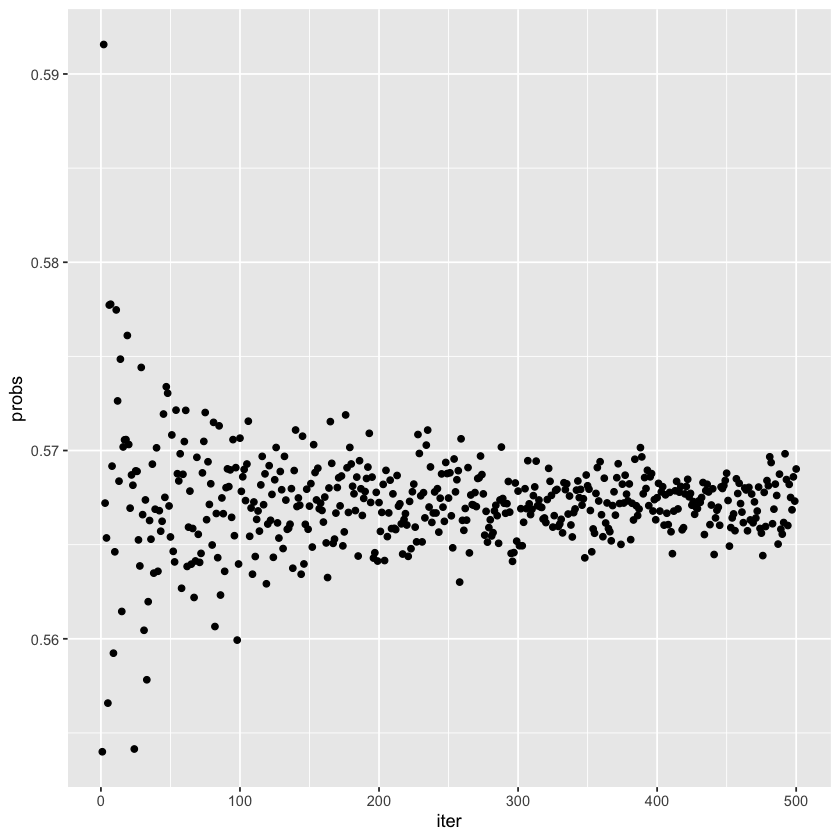

In [134]:
iter = seq(1,500)
probs = sapply(iter, mc_simul)
qplot(iter,probs)

7. Assuming you do this survey again in California, Find the probability that this person is currently using an iPhone given that they like the feature.

    a. Use your function from part 5 and the function you wrote in part 2 to find the above probability.

    b. Use the function you wrote in part 4 to calculate the above probability without using a simulation.

    c. Compare these probabilities you got from the simulation with the probability you calculate by hand(Q7: part a and b). What can you conclude?



c. If you have enough number of iteration, we can get same probability.

Data: From those people you randomly picked, there were 610 people who are currently using an iPhone, 580 people using a different phone and don’t want to switch phones ever and 330 people are currently using another phone but hoping to switch to an iPhone in the future.

Of those who are currently using an iPhone, 92% like the new feature. From those who are currently using a different phone and don’t want to switch phones ever, 48% liked the new feature.From those who are currently using another phone but hoping to switch to an iPhone in the future, 67% liked the new feature.



1. What can you say about using Monte Carlo simulation for this problem?


2. Based on the data from these 2 states, as the Data Scientist in this research team, what would be your final (non-technical) conclusion?

In [135]:
mc_simul2 = function(iter){
    results = replicate(iter,sampling(610,580,330,0.92,0.48,0.67))
    return(mean(results,na.rm=TRUE))
}
mc_simul2(500)

[1] 0.5288158

In [131]:
my_function(610,580,330,0.92,0.48,0.67)

[1] 0.5290846

We can use Monte Carlo simulation on other states to get their probability.